<a href="https://colab.research.google.com/github/FinleyMM/NBA_athlete_scouting/blob/main/Another_copy_of_Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("CW") \
    .getOrCreate()

# Now you can use the spark variable to interact with Spark

# Step 2: Load the dataset into a PySpark DataFrame
# Assuming you have the dataset file named 'nba_player_stats.csv'
data = "/content/Book1.csv"
df = spark.read.csv(data, header=True, inferSchema=True)
# Check the column names and DataFrame schema
print("Column Names:")
print(df.columns)
print("\nDataFrame Schema:")
df.printSchema()

# Step 3: Select relevant performance metrics as features for clustering
# Make sure the column names match the actual column names
feature_cols = ["PTS", "AST", "TRB", "STL", "BLK"]


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt

KeyboardInterrupt



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA PCA Example") \
    .getOrCreate()

# Load the NBA dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for PCA
selected_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "FG%", "3PA", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

# Drop any rows with missing values
df = df.dropna()

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
df = assembler.transform(df)

# Apply PCA
num_principal_components = 2  # Specify the number of principal components you want
pca = PCA(k=num_principal_components, inputCol="features", outputCol="pca_features")
model = pca.fit(df)

# Transform the data using the PCA model
df_pca = model.transform(df)

# Show the PCA features
df_pca.select("pca_features").show(truncate=False)

# Show the explained variance ratio
print("Explained Variance Ratio:", model.explainedVariance.toArray())

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[-51.63623351585665,-28.723934027888234] |
|[-66.37113529636561,-0.18597244297105675]|
|[-115.92523114175904,-1.7990996692532875]|
|[-60.363297180366544,-26.87302654657208] |
|[-71.15444143374201,-41.273067855002225] |
|[-45.18262707161735,-39.10623707025661]  |
|[-104.87908767400452,-7.429477796609895] |
|[-103.88632536351784,-3.034073012673666] |
|[-53.947964579496634,-34.56746100944635] |
|[-86.47640179055313,-18.528626383047932] |
|[-102.54323725818075,3.542151848813745]  |
|[-25.54536151132574,-26.643181563608326] |
|[-51.447791202480076,-35.24351678808228] |
|[-103.72139839250877,-1.8118653324543743]|
|[-18.318169105096537,-10.74884421109195] |
|[-86.174036594388,-27.86741083585311]    |
|[-103.4479330170127,-1.7368705593221918] |
|[-29.377617522352466,-22.374518004820622]|
|[-54.1353820420551,-9.86057857477955]    |
|[-22.75115606748658,-21.2389690

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Assume you have already performed PCA and stored the result in a column named 'features'

# Create KMeans instance
kmeans = KMeans().setK(4).setSeed(42)

# Fit the model on the PCA-transformed data
model = kmeans.fit(df)

# Make predictions
predictions = model.transform(df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score:", silhouette_score)

# Show the result
centers = model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)


IllegalArgumentException: features does not exist. Available: Rk, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Assuming you have your data stored in a DataFrame named 'df'

# Combine relevant columns into a feature vector
feature_columns = ["PTS", "AST"]  # Add other columns as needed
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Perform PCA transformation
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
model = pca.fit(df_assembled)
df_transformed = model.transform(df_assembled)

# Create KMeans instance
kmeans = KMeans().setK(4).setSeed(42)

# Fit the model on the PCA-transformed data
model = kmeans.fit(df_transformed)

# Make predictions
predictions = model.transform(df_transformed)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score:", silhouette_score)

# Show the result
centers = model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)


Silhouette Score: 0.6835129229448962
Cluster Centers:
[9.61761905 2.25333333]
[26.70789474  5.38947368]
[17.4752809   4.04719101]
[3.87709677 0.8816129 ]


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import ClusteringEvaluator

# Initialize SparkSession
spark2 = SparkSession.builder \
    .appName("KMeans Cross Validation Viz") \
    .getOrCreate()

# Assuming you have your data stored in a DataFrame named 'df'
# Combine relevant columns into a feature vector
feature_columns = ["PTS", "AST"]  # Add other columns as needed
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Perform PCA transformation
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
model = pca.fit(df_assembled)
df_transformed = model.transform(df_assembled)

# Create KMeans instance
kmeans = KMeans()
# Define a grid of parameters to search over
paramGrid = ParamGridBuilder() \
    .addGrid(kmeans.k, [2, 3, 4, 5]) \
    .build()

# Create evaluator
evaluator = ClusteringEvaluator()

# Create CrossValidator
crossval = CrossValidator(estimator=kmeans,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # Use 5 folds for cross-validation

# Fit the model
cvModel = crossval.fit(df_transformed)

# Get the best model
bestModel = cvModel.bestModel

# Make predictions
predictions = bestModel.transform(df_transformed)

# Evaluate clustering by computing Silhouette score
silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score:", silhouette_score)

# Show the result
centers = bestModel.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)



Py4JJavaError: An error occurred while calling o4152.fit.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:829)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:829)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.broadcastInternal(SparkContext.scala:1659)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1644)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.buildReader(CSVFileFormat.scala:102)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues(FileFormat.scala:138)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues$(FileFormat.scala:129)
	at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:346)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:548)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:537)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecute(DataSourceScanExec.scala:575)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:527)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:455)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:454)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:498)
	at org.apache.spark.sql.execution.FilterExec.inputRDDs(basicPhysicalOperators.scala:242)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:51)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:751)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.DeserializeToObjectExec.doExecute(objects.scala:93)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:195)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:246)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:243)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:191)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:207)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:206)
	at org.apache.spark.sql.Dataset.rdd$lzycompute(Dataset.scala:3849)
	at org.apache.spark.sql.Dataset.rdd(Dataset.scala:3847)
	at org.apache.spark.ml.feature.PCA.fit(PCA.scala:89)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
# Load the dataset into a PySpark DataFrame with the correct delimiter
file_path = "/content/Book1.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True, sep=",")

# Drop rows with missing values
df = df.na.drop(subset=feature_cols)


In [ ]:
# Extract the concatenated string of column names
columns_string = 'Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS'

# Extract the concatenated string of column names
columns_string = 'Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS'

# Split the string into individual column names using the comma delimiter
column_names = columns_string.split(',')

# Now you have a list of column names
print(column_names)
# Drop rows with missing values
df = df.na.drop(subset=column_names)

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


NameError: name 'cluster_centers' is not defined

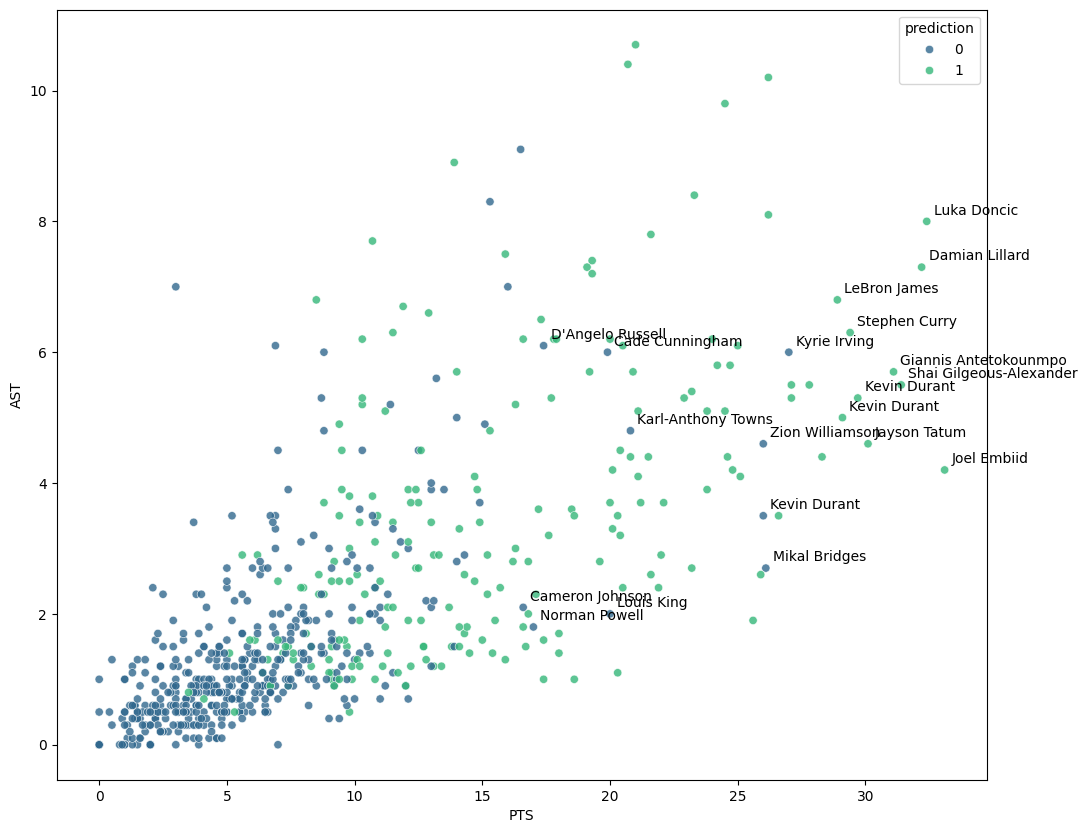

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert predictions DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("Player", "PTS", "AST", "prediction").toPandas()

# Plotting
plt.figure(figsize=(12, 10))

# Check if the column names are correctly specified and present in the DataFrame
if "PTS" in predictions_pd.columns and "AST" in predictions_pd.columns:
    # Scatter plot with color mapping
    sns.scatterplot(data=predictions_pd, x="PTS", y="AST", hue="prediction", palette="viridis", alpha=0.8)

    # Annotate specific data points (e.g., top 3 players in each cluster)
    for cluster, players in cluster_players.items():
        cluster_data = predictions_pd[predictions_pd["prediction"] == int(cluster.split()[1])]
        top_players = cluster_data.sort_values(by=["PTS", "AST"], ascending=False).head(10)
        for i, player in top_players.iterrows():
            plt.annotate(player["Player"], (player["PTS"], player["AST"]), textcoords="offset points", xytext=(5,5), ha="left")

    # Plot cluster centers
    plt.scatter(cluster_centers["PTS"], cluster_centers["AST"], marker="X", s=200, c="black", label="Cluster Center")

    plt.xlabel("Points per Game (PTS)")
    plt.ylabel("Assists per Game (AST)")
    plt.title("Clustering Analysis of NBA Players: PTS vs. AST")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.show()
else:
    print("The DataFrame does not contain the columns 'PTS' and 'AST'. Please verify the column names.")


In [ ]:
# Import necessary libraries
import pandas as pd

# Convert predictions DataFrame to Pandas DataFrame for further analysis
predictions_pd = predictions.select("Player", "prediction").toPandas()

# Create an empty dictionary to store players for each cluster
cluster_players = {}
num_clusters = 5
# Iterate over each cluster
for cluster in range(num_clusters):
    # Filter players belonging to the current cluster
    cluster_data = predictions_pd[predictions_pd["prediction"] == cluster]

    # Sample 10 players from the cluster (if available)
    sample_players = cluster_data["Player"].sample(min(10, len(cluster_data)))

    # Store the sampled players in the dictionary
    cluster_players[f"Cluster {cluster}"] = sample_players.tolist()

# Print the sampled players for each cluster
for cluster, players in cluster_players.items():
    print(f"{cluster}:")
    for player in players:
        print(player)
    print()

Cluster 0:
Marvin Bagley III
Jonathan Isaac
Devonte' Graham
Cade Cunningham
Udoka Azubuike
Luke Kornet
Haywood Highsmith
Willy Hernangomez
Dominick Barlow
Jalen McDaniels

Cluster 1:
Josh Hart
P.J. Washington
Torrey Craig
Damian Lillard
Gary Harris
Dejounte Murray
Malik Beasley
Wendell Carter Jr.
Santi Aldama
John Collins

Cluster 2:

Cluster 3:

Cluster 4:



In [ ]:
# Assuming you have predictions_pd DataFrame containing "PTS", "AST", and "prediction" columns

# Drop the "Player" column before computing cluster centers
numeric_columns = ["PTS", "AST", "prediction"]
cluster_centers = predictions_pd.groupby("prediction")[numeric_columns].mean()

# Print cluster centers
print(cluster_centers)

                  PTS       AST  prediction
prediction                                 
0            5.900000  1.353881         0.0
1           15.347368  3.437799         1.0


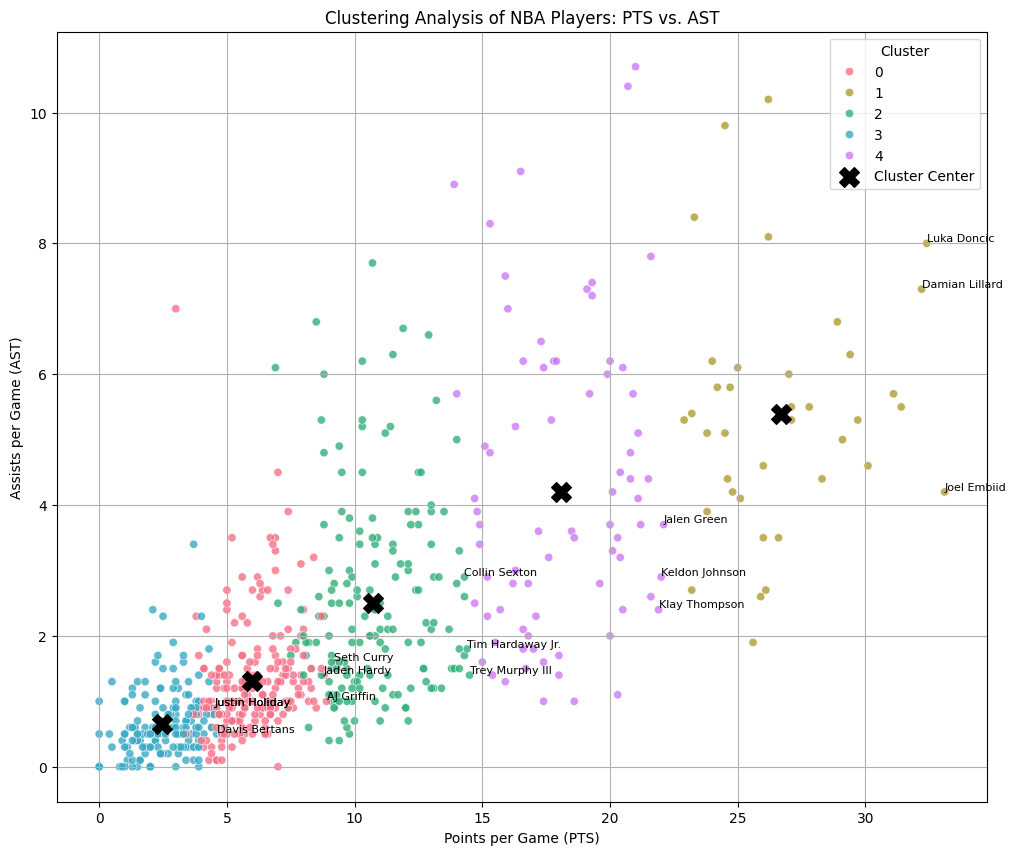

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("Player", "PTS", "AST", "prediction").toPandas()

# Define a custom color palette
palette = sns.color_palette("husl", num_clusters)

# Plotting
plt.figure(figsize=(12, 10))

# Scatter plot with color mapping
sns.scatterplot(data=predictions_pd, x="PTS", y="AST", hue="prediction", palette=palette, alpha=0.8)

# Annotate specific data points (e.g., top players in each cluster)
for cluster in range(num_clusters):
    cluster_data = predictions_pd[predictions_pd["prediction"] == cluster]
    top_players = cluster_data.sort_values(by=["PTS", "AST"], ascending=False).head(3)
    for i, player in top_players.iterrows():
        plt.text(player["PTS"], player["AST"], player["Player"], ha='left', va='bottom', fontsize=8)

# Plot cluster centers
plt.scatter(cluster_centers["PTS"], cluster_centers["AST"], marker="X", s=200, c="black", label="Cluster Center")

plt.xlabel("Points per Game (PTS)")
plt.ylabel("Assists per Game (AST)")
plt.title("Clustering Analysis of NBA Players: PTS vs. AST")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


<ipython-input-27-475735441ba1>:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=predictions_pd, x="PTS", y="AST", hue="prediction", palette=palette, alpha=0.8)


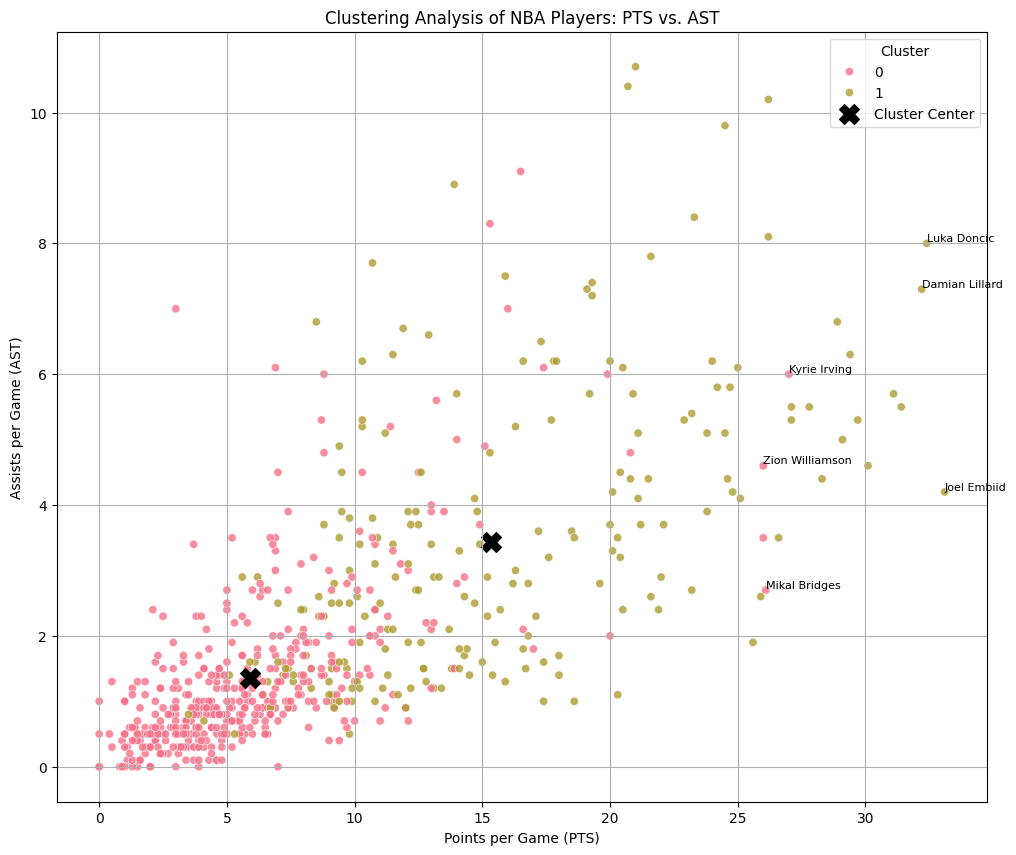

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("Player", "PTS", "AST", "prediction").toPandas()

# Define a custom color palette
palette = sns.color_palette("husl", num_clusters)

# Plotting
plt.figure(figsize=(12, 10))

# Scatter plot with color mapping
sns.scatterplot(data=predictions_pd, x="PTS", y="AST", hue="prediction", palette=palette, alpha=0.8)

# Annotate specific data points (e.g., top players in each cluster)
for cluster in range(num_clusters):
    cluster_data = predictions_pd[predictions_pd["prediction"] == cluster]
    top_players = cluster_data.sort_values(by=["PTS", "AST"], ascending=False).head(3)
    for i, player in top_players.iterrows():
        plt.text(player["PTS"], player["AST"], player["Player"], ha='left', va='bottom', fontsize=8)

# Plot cluster centers
plt.scatter(cluster_centers["PTS"], cluster_centers["AST"], marker="X", s=200, c="black", label="Cluster Center")

plt.xlabel("Points per Game (PTS)")
plt.ylabel("Assists per Game (AST)")
plt.title("Clustering Analysis of NBA Players: PTS vs. AST")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Root Mean Squared Error (RMSE) on test data: 0.07254862770893133
Coefficients: [0.0005946178309765515,0.00036339995559559824,0.0001263043313294459,-0.002299676966932791,1.8098105192919822,0.08963127241148025,0.12392304077746458,1.1313762280117283,-0.06397957328684589,0.026899278807103823,0.1989376756617689,-0.09220293332521436,-0.09168081250970903,0.9710533558097092,0.020809659086456878,0.006327197567224447,-0.010529406242761958,-0.00784592906331666,0.006604306962551918,-0.0013872131015743182,0.021744734095140664,0.03084006566126728,0.0032992298350468167,-0.004831028798825587]
Intercept: -0.045754507275927274


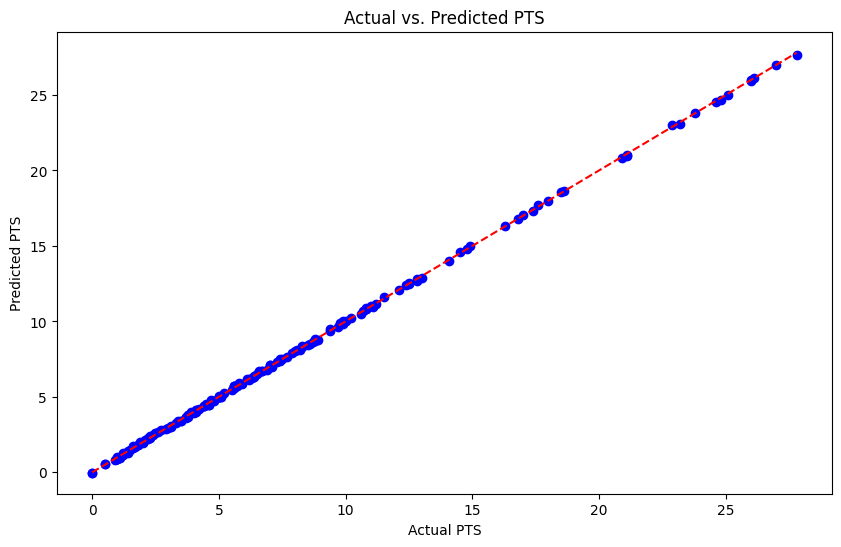

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA Linear Regression") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for linear regression
selected_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

# Drop any rows with missing values
df = df.dropna()

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns[:-1], outputCol="features")
df = assembler.transform(df)

# Select the feature column and the target column
data = df.select("features", "PTS")

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="PTS")

# Train the linear regression model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="PTS", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data:", rmse)

# Print the coefficients and intercept
print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)
import matplotlib.pyplot as plt
import numpy as np

# Extract actual and predicted values
actual_values = np.array(predictions.select("PTS").collect())
predicted_values = np.array(predictions.select("prediction").collect())

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(actual_values, predicted_values, color='blue')
plt.plot([0, np.max(actual_values)], [0, np.max(actual_values)], color='red', linestyle='--')

plt.title('Actual vs. Predicted PTS')
plt.xlabel('Actual PTS')
plt.ylabel('Predicted PTS')

plt.show()

# Stop the SparkSession
spark.stop()


Root Mean Squared Error (RMSE) on test data: 0.14839029284820038
Coefficients: [0.15580586296249432,0.002106362671675341,0.026164897442113727,0.0003806233465532403,-0.0013843250588123554]
Intercept: 0.08524296902621809


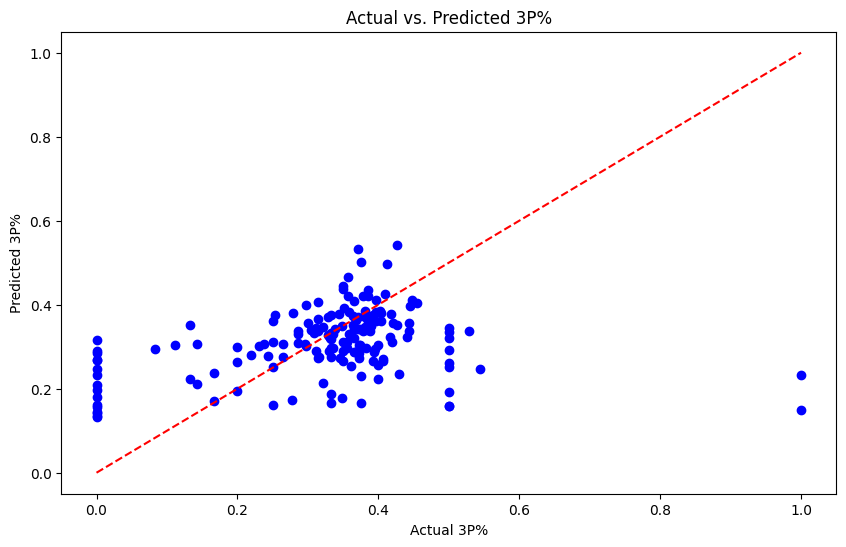

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA Linear Regression") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for linear regression
selected_columns = ["FT%",'Age','3PA','G', 'GS', 'MP']

# Drop any rows with missing values
df = df.dropna()

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns[:-1], outputCol="features")
df = assembler.transform(df)

# Select the feature column and the target column
data = df.select("features", "3P%")

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="3P%")

# Train the linear regression model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="3P%", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data:", rmse)

# Print the coefficients and intercept
print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)
import matplotlib.pyplot as plt
import numpy as np

# Extract actual and predicted values
actual_values = np.array(predictions.select("3P%").collect())
predicted_values = np.array(predictions.select("prediction").collect())

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(actual_values, predicted_values, color='blue')
plt.plot([0, np.max(actual_values)], [0, np.max(actual_values)], color='red', linestyle='--')

plt.title('Actual vs. Predicted 3P%')
plt.xlabel('Actual 3P%')
plt.ylabel('Predicted 3P%')

plt.show()

# Stop the SparkSession
spark.stop()


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA Hierarchical Clustering") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for clustering
selected_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

# Drop any rows with missing values
df = df.dropna()

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
df = assembler.transform(df)

# Select the feature column
data = df.select("features")

# Initialize the hierarchical clustering model
bkmeans = BisectingKMeans(featuresCol="features", predictionCol="prediction", k=2)

# Train the hierarchical clustering model
bkmeans_model = bkmeans.fit(data)

# Make predictions
predictions = bkmeans_model.transform(data)

# Evaluate the clustering model
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette Score:", silhouette)



Silhouette Score: 0.7207589029120227


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import ClusteringEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA Hierarchical Clustering") \
    .getOrCreate()

# Load the dataset
data = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for clustering
selected_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

# Drop any rows with missing values
data = data.dropna()

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
data = assembler.transform(data)

# Initialize the hierarchical clustering model
bkmeans = BisectingKMeans(featuresCol="features", predictionCol="prediction")

# Define a grid of parameters to search over
param_grid = ParamGridBuilder() \
    .addGrid(bkmeans.k, [2, 3, 4, 5, 6]) \
    .build()

# Define an evaluator
evaluator = ClusteringEvaluator()

# Define cross-validation
crossval = CrossValidator(estimator=bkmeans,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)

# Run cross-validation to find the best set of parameters
cv_model = crossval.fit(data)

# Get the best model from cross-validation
best_model = cv_model.bestModel

# Get the best number of clusters (k)
best_k = best_model.getK()

# Print the best k
print("Best k:", best_k)

# Stop the SparkSession
spark.stop()


Best k: 2


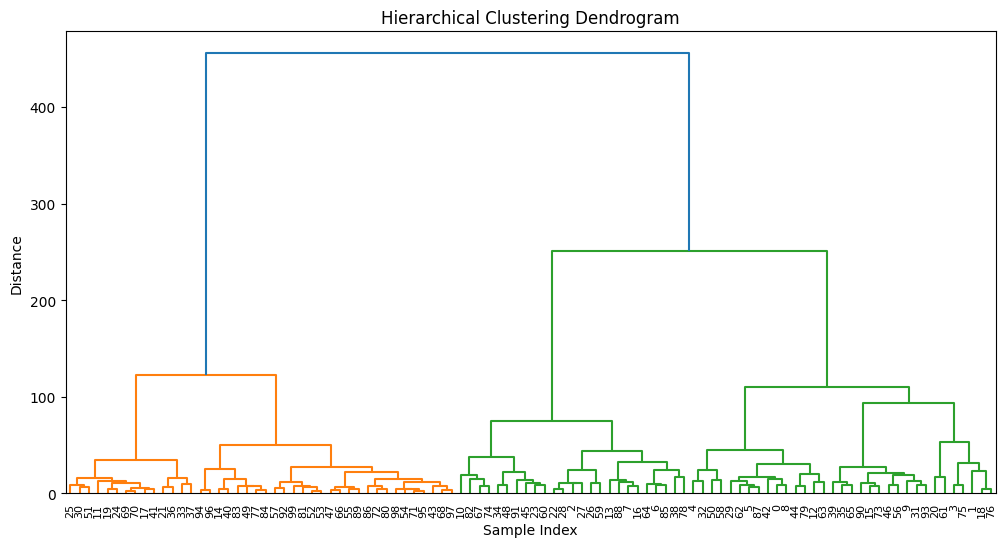

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA Hierarchical Clustering") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for clustering
selected_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

# Drop any rows with missing values
df = df.dropna()

# Sample 100 rows
sampled_df = df.limit(100)

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
df = assembler.transform(sampled_df)

# Select the feature column
data = df.select("features")

# Initialize the hierarchical clustering model
bkmeans = BisectingKMeans(featuresCol="features", predictionCol="prediction", k=2)

# Train the hierarchical clustering model
bkmeans_model = bkmeans.fit(data)

# Make predictions
predictions = bkmeans_model.transform(data)

# Extract features from the Spark DataFrame and convert to NumPy array
features_array = np.array(data.select("features").rdd.map(lambda x: x[0]).collect())

# Perform hierarchical clustering using scipy
Z = linkage(features_array, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

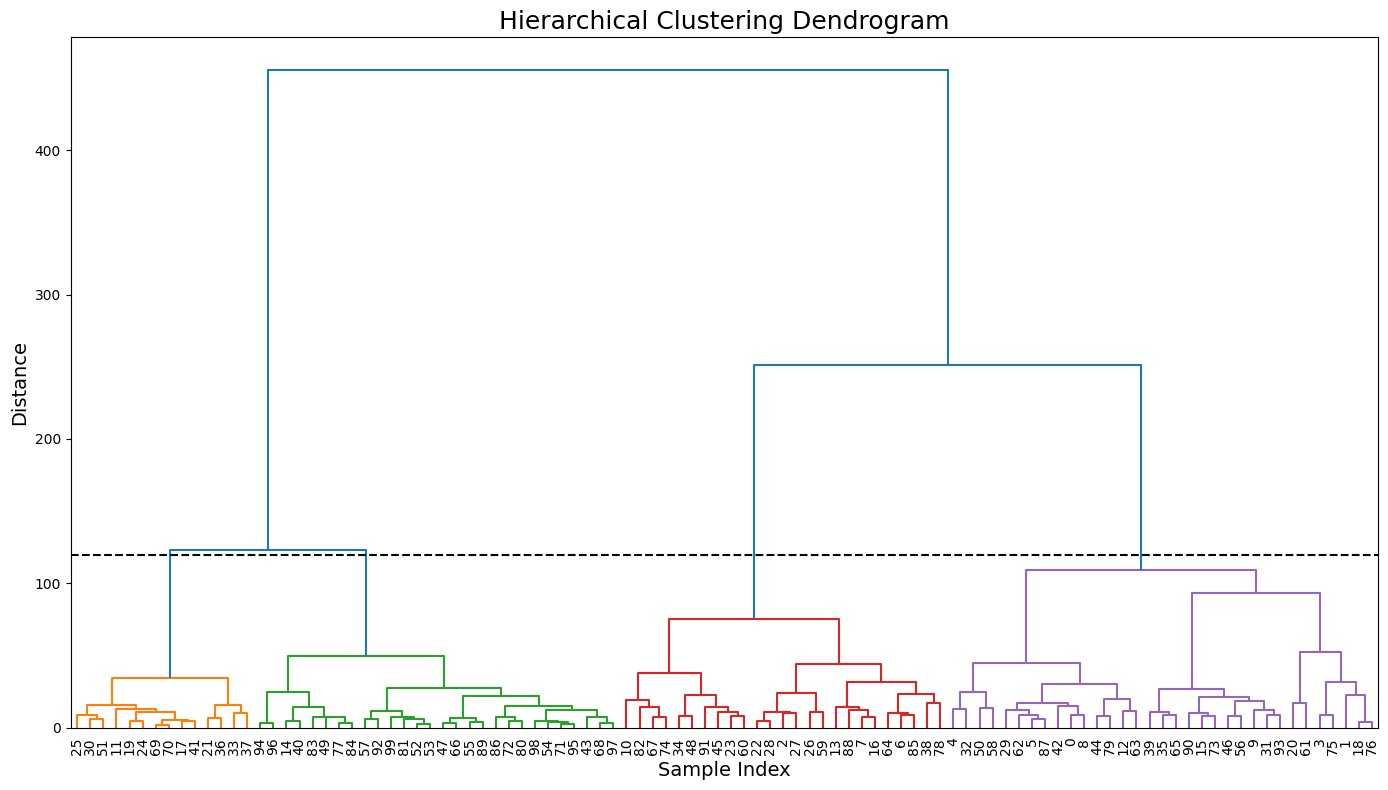

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA Hierarchical Clustering") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for clustering
selected_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

# Drop any rows with missing values
df = df.dropna()

# Sample 100 rows
sampled_df = df.limit(100)

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
df = assembler.transform(sampled_df)

# Select the feature column
data = df.select("features")

# Initialize the hierarchical clustering model
bkmeans = BisectingKMeans(featuresCol="features", predictionCol="prediction", k=2)

# Train the hierarchical clustering model
bkmeans_model = bkmeans.fit(data)

# Make predictions
predictions = bkmeans_model.transform(data)

# Extract features from the Spark DataFrame and convert to NumPy array
features_array = np.array(data.select("features").rdd.map(lambda x: x[0]).collect())

# Perform hierarchical clustering using scipy
Z = linkage(features_array, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 8))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)
dendrogram(Z, leaf_rotation=90., leaf_font_size=10., color_threshold=120)
plt.axhline(y=120, color='k', linestyle='--', linewidth=1.5)  # Add threshold line
plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("NBA SVM Classification") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("/content/Book1.csv", header=True, inferSchema=True)

# Selecting relevant columns for classification
selected_columns = ["2P", "2PA", "2P%", "FT", "FTA", "FT%"]

# Drop any rows with missing values
df = df.dropna()

from pyspark.sql.functions import when

# Convert '3PM' column into binary labels based on a threshold value
threshold = 1.4
df = df.withColumn("label", when(df["3P"] > threshold, 1).otherwise(0))

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
df = assembler.transform(df)

# Select the feature column and target variable
data = df.select("features", "label")

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Initialize the SVM model
svm = LinearSVC(featuresCol="features", labelCol="label")

# Train the SVM model
svm_model = svm.fit(train_data)

# Make predictions on the test data
predictions = svm_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8749329039184109


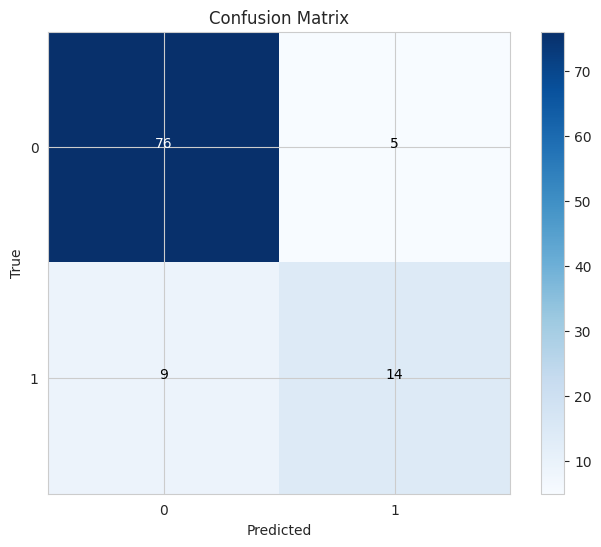

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Create confusion matrix
y_true = predictions.select("label").rdd.flatMap(lambda x: x).collect()
y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()